# Model Değerlendirmesi


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Model için farklı kısımlardan bölünmesini sağlar.
from sklearn.model_selection import cross_val_score 

from sklearn.datasets import fetch_california_housing

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators=100)
heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [124]:
model.fit(X_train, y_train)
y_probs = model.predict_proba(X_test)
y_probs[:5] # 0. index negatif olma, 1. index pozitif olma olasılığı

array([[0.64, 0.36],
       [0.74, 0.26],
       [0.92, 0.08],
       [0.63, 0.37],
       [0.88, 0.12]])

In [125]:
cross_val_score(model, X, y, cv=5)

array([0.83606557, 0.86885246, 0.7704918 , 0.83333333, 0.8       ])

In [126]:
model_single_score = model.score(X_test, y_test)
model_cross_score = np.mean(cross_val_score(model, X, y, cv=5))

model_single_score, model_cross_score

(0.8026315789473685, 0.8480874316939891)

---
### Classification Modelini Değerlendirme

- Accuracy
- Area under ROC curve
- ROC - AUC
- Confusion matrix
- Classification report

---

In [127]:
# ROC değeri Gerçek pozitif oranı  yanlış pozitif oranına göre 
# çizildği için [0][1] index de bulunan veriler alınır 
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.36, 0.26, 0.08, 0.37, 0.12, 0.49, 0.93, 0.58, 0.81, 0.09])

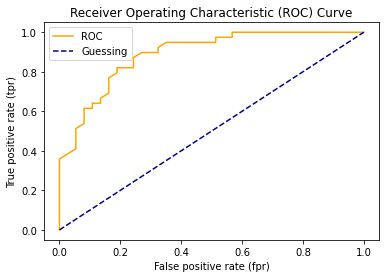

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

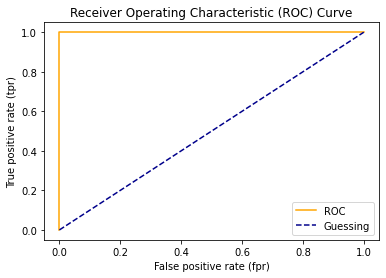

In [129]:
fpr, tpr, thresholds = roc_curve(y_test, y_test) # %100 doğru model
plot_roc_curve(fpr, tpr)

In [130]:
roc_auc_score(y_test, y_probs_positive)

0.8894663894663895

---
### Confusion matrix

`Confusion matrix`, bir modelin öngördüğü etiketleri ve tahmin etmesi gereken gerçek etiketleri karşılaştırmanın hızlı bir yoludur. 

---

In [131]:
# TN(0,0) - FN(1,0) - FP(0,1) - TN(1,1) matrix değelerini verir.
y_preds = model.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[31,  6],
       [ 9, 30]])

In [132]:
# Daha anşalışır bir çıktı için 
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,31,6
1,9,30


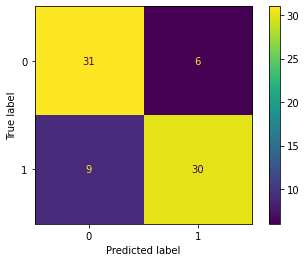

In [133]:
# Görsel olarak çıktı vermek
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

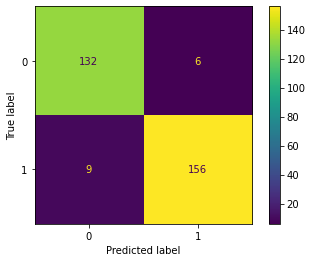

In [134]:
# Tüm verilerde
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y);

In [135]:
from sklearn.metrics import classification_report

#  Model performansını değerlendirmek için kullanılır
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.83      0.77      0.80        39

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



---
### Regression Modelini Değerlendirme
- **R^2 (pronounced r-squared) or coefficient of determination:** Model tahminlerinizi hedeflerin ortalamasıyla karşılaştırır. Değerler negatif sonsuzluktan (çok zayıf bir model) 1'e kadar değişebilir. Örneğin, modelinizin yaptığı tek şey hedeflerin ortalamasını tahmin etmekse, R^2 değeri 0 olacaktır. Ve eğer modeliniz bir sayı aralığını mükemmel bir şekilde tahmin ediyorsa R^2 değeri 1 olacaktır.
- **Mean absolute error (MAE):** Gerçek değerden ne kadar saptığını gösterir. Tahminler ile gerçek değerler arasındaki mutlak farkların ortalamasıdır. Model tahminlerinizin ne kadar yanlış olduğuna dair size bir fikir verir.
- **Mean squared error (MSE):** MSE, gerçek ve tahmin edilen değerler arasındaki hataların karesinin ortalamasıdır. Gerçek değerlerden ortalama olarak karesel sapmasını gösterir. Farkların karelerinin ortalamasını alarak hesaplanır. Düşük MSE, modelin iyi performans gösterdiğini belirtir. MSE, büyük hatalara daha duyarlıdır çünkü hataların karesi alınır.

**Not:** Bu kısımda farklı aralıkları görmek için `scoring` yapılabilir. `cross_val_score(clf, X, y, cv=5, scoring="recall")`

---

In [136]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [137]:
np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8066196804802649

In [138]:
y_test.mean()

2.0550030959302323

In [139]:
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

--- 
#### R^2

---

In [140]:
r2_score(y_true=y_test, y_pred=y_test_mean), r2_score(y_true=y_test, y_pred=y_test)

(0.0, 1.0)

---
#### Mean absolute error (MAE)

---

In [141]:
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

In [142]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(5)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240


In [143]:
np.abs(df["differences"]).mean() # MAE değerini kendimiz hesaplamış olduk

0.3265721842781009

---
#### Mean squared error (MSE)

---

In [144]:
y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [145]:
df["squared_differences"] = np.square(df["differences"])
squared = np.square(df["differences"])
squared.mean() #  MSE değerini kendimiz hesaplamış olduk

0.2534073069137548

---
#### `scoring` Daha Doğru Sonuçlar
- scoring="accuracy"
- scoring="precision"
- scoring="recall"
- scoring="neg_mean_squared_error"
- scoring="neg_mean_absolute_error"
---

In [146]:
cv_acc = cross_val_score(model, X, y, cv=5, scoring=None) # if scoring=None, esitmator's default scoring evaulation metric is used (accuracy for classification models)
cv_acc

array([0.50093337, 0.70272479, 0.74115332, 0.61575704, 0.68255292])

In [147]:
np.mean(cv_acc)

0.6486242888224971

In [151]:
# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

print("\nRegression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 78.69%
Precision: 0.7948717948717948
Recall: 0.8611111111111112
F1: 0.8266666666666667

Regression metrics on the test set
R2 score: 0.11888888888888904
MAE: 0.21311475409836064
MSE: 0.21311475409836064
